# importing necessary libraries


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Understanding the strucuture of the Dataset


## Load the Dataset : Loading the dataset into pandas DataFrame

In [116]:
df= pd.read_csv('second_hand_cars.csv')
df.head(2)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN


In [117]:
df.tail(2)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
2498,Honda,Swift,XL,CNG,Needs Replacement,2019,Second,10-872-5236,67437,348921,Manual,Red,Full Service History,Valid Until [date],Not Available,"Leather Seats, Sunroof, Alloy Wheels, Music Sy..."
2499,Renault,Kwid,GT,Diesel,Needs Replacement,2024,Second,25-274-7784,88084,955324,Automatic,Gold,Full Service History,Valid Until [date],Available,"Leather Seats, Alloy Wheels"


## Data Types: Indentifying data types of each columns

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

#### Key information from above result : df.info()
    - Total data row / record == 2500
    - Total number of columns == 16
    - Mileage and Price columns have int64 as data type, and all other are object
    - Variant and Accessories columns have null values , other have no null values

In [119]:
df.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

# Identifying dimensions, key stats

In [120]:
# display dataframe dimension
df.shape

(2500, 16)

In [121]:
# listing all the available columns
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories'],
      dtype='object')

In [122]:
# the describe method gives us necessary stats for the numberical columns
df.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


Following stats we can get from describe() method:
- Mean for Mileage and Price are 104777.79200 and 608120.897600 respectively.
- Standard Deviation for Mileage and Price are 55544.487467 and 231056.126713 respectively.
- Similarly, Count for Mileage and Price are 2500 and 2500 respectively.

## Description of features (columns)
- Company Name: The manufacturer of the car (e.g., Maruti, Hyundai). 
- Car Name: The model name of the car (e.g., Swift, i20).
- Variant: The specific variant of the car model (e.g., VDI, Sportz).
- Fuel Type: Type of fuel used by the car (e.g., Petrol, Diesel).
- Tyre Condition: Condition of the tyres (e.g., New, Good, Average, Worn).
- Make Year: Year the car was manufactured.
- Owner Type: Number of previous owners (e.g., First, Second, Third).
- Registration Number: Registration number of the vehicle. (e.g.84-436-5584 )
- Mileage: The mileage of the car (in kmpl).
- Price: The selling price of the car.
- Transmission Type: Type of transmission (e.g., Manual, Automatic).
- Body Color: Color of the car's body.
- Service Record: Whether the car has a service record (Yes/No). 
- Insurance: Whether the car has insurance (Yes/No). 
- Registration Certificate: Whether the car has a registration certificate (Yes/No)
- Accessory: Additional accessories available with the car. 



# Part 2: Handling Missing Data and Outliers + other pre-processing

## Identify missing value in the dataset
- after checking, it looks like variant has 262 and Accessories has 482 null values. Other do not have null values
- Both Variant and Accessories are categorical varaible 

In [123]:
df.isna().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

## Decide on strategies to handle missing data (imputation, deletion, or advanced methods).

In [124]:
# lets check missing percentage across Variant and Accessories
for i in ['Variant','Accessories']:
    print(f'missing percentage for {i} is {(df[i].isnull().sum()*100)/len(df)} %')

missing percentage for Variant is 10.48 %
missing percentage for Accessories is 19.28 %


since the missing percentage for both, Variant and Accessories, it would be better to not delete these records. We need to replace null with appropriate values for the feature

In [125]:
# lets check for variant regarding what are features
variant_distribution = df['Variant'].value_counts(normalize=True)
variant_distribution

Variant
LE          0.120643
GT          0.116622
RXE         0.113941
Highline    0.113494
SE          0.111707
ZXI         0.109473
EX          0.107685
XL          0.104558
SL          0.101877
Name: proportion, dtype: float64

It looks like LE as Variant has maximum number of data associated. However, the difference of value count across different categories is also not muc.

In [126]:
# lets check for variant regarding what are features
accessories_distribution = df['Accessories'].value_counts(normalize=True)
accessories_distribution

Accessories
Sunroof                                               0.058969
Music System                                          0.047572
GPS                                                   0.047572
Leather Seats                                         0.046581
Alloy Wheels                                          0.037166
                                                        ...   
Sunroof, Music System, GPS, Leather Seats             0.000496
Sunroof, GPS, Alloy Wheels, Leather Seats             0.000496
Music System, Sunroof, Alloy Wheels, Leather Seats    0.000496
Sunroof, Alloy Wheels, GPS, Music System              0.000496
Alloy Wheels, GPS, Leather Seats, Music System        0.000496
Name: proportion, Length: 203, dtype: float64

It looks like Sunroof as Accessories has maximum number of data associated. However, the difference of value count across different categories is also not muc.

### Selection random value to fill na across Variant and Accessories

In [127]:
# since there is not much differences in value counts across different value- let choose value randomly

# Define a function to randomly sample based on the distribution
def random_sample_variant(x):
    if pd.isnull(x):
        return np.random.choice(variant_distribution.index, p=variant_distribution.values)
    else:
        return x
    
# Define a function to randomly sample based on the distribution
def random_sample_accesories(x):
    if pd.isnull(x):
        return np.random.choice(accessories_distribution.index, p=accessories_distribution.values)
    else:
        return x

In [128]:
# replacing null values with approapriate value from variant

df['Variant'] = df['Variant'].apply(random_sample_variant)


In [129]:
# replacing null values with approapriate value from accessories

df['Accessories'] = df['Accessories'].apply(random_sample_variant)


In [130]:
df.isna().sum()

Company Name                0
Car Name                    0
Variant                     0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Accessories                 0
dtype: int64

Look above we have no null value now

## Identifying outliers
To identify outliers using visualization and statistical methods, we'll follow a structured approach:

    Visualization Methods:
        Box Plots: For identifying outliers in numerical data.
        Scatter Plots: For identifying outliers in two-dimensional relationships between numerical variables.

    Statistical Methods:
        Z-Score: For identifying outliers in a normally distributed dataset.
        Interquartile Range (IQR): For identifying outliers based on the spread of the middle 50% of the data.

### Finding Outliers using Box-Plot method for numberical data
- The Box-Plot method is a graphical technique used to identify outliers in a dataset and understand the distribution of the data. It's a very effective way to visually summarize the distribution of a dataset. The key components of a box plot include the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum, as well as any potential outliers.

<Figure size 1200x800 with 0 Axes>

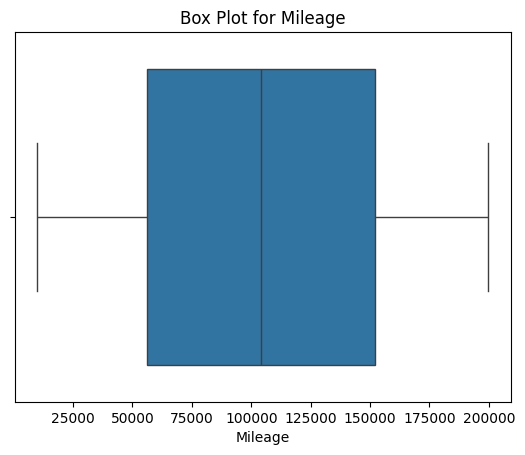

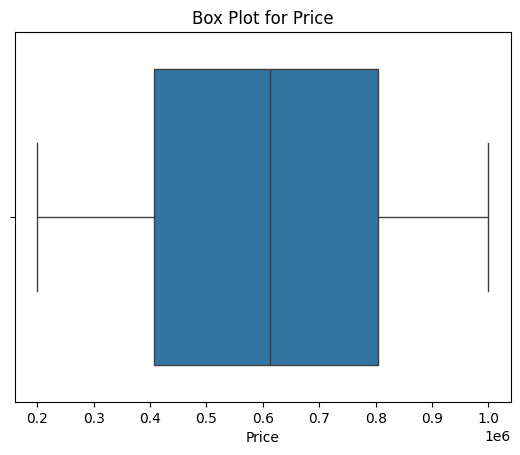

In [131]:
# identify outliers for Mileage and Price using box plot
# Setting figure size
plt.figure(figsize=(12, 8))

# Create a box plot for each numerical column
for column in ["Mileage", "Price"]:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Looks like there is no outliers for both the features: Mileage and Price

### Just trying to access distribution of Mileage and price

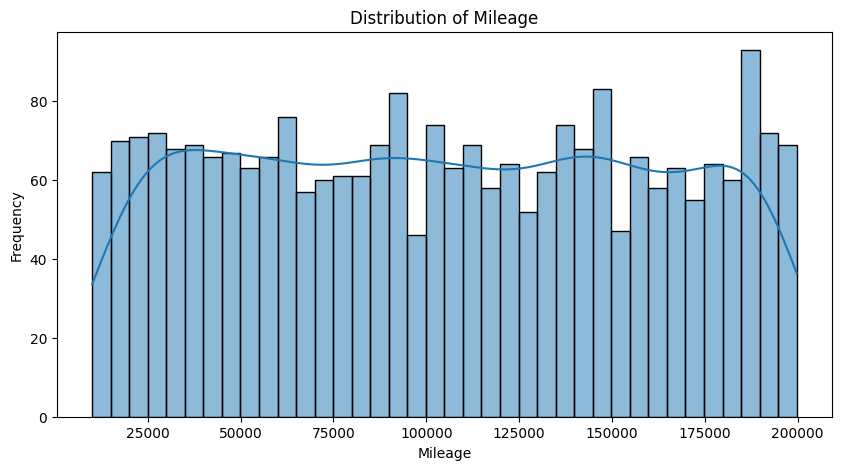

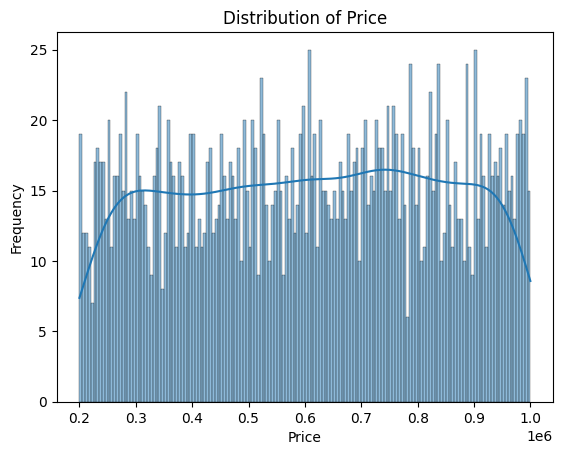

In [132]:
# Plotting the distribution of Mileage
plt.figure(figsize=(10, 5))
for column in ["Mileage", "Price"]:
    sns.histplot(df[column], kde=True,binwidth=5000)

    # Adding titles and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

### Outlier detection using Scatter plot
- A scatter plot is a type of data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. It is a powerful tool for identifying correlations, patterns, and outliers within a dataset.

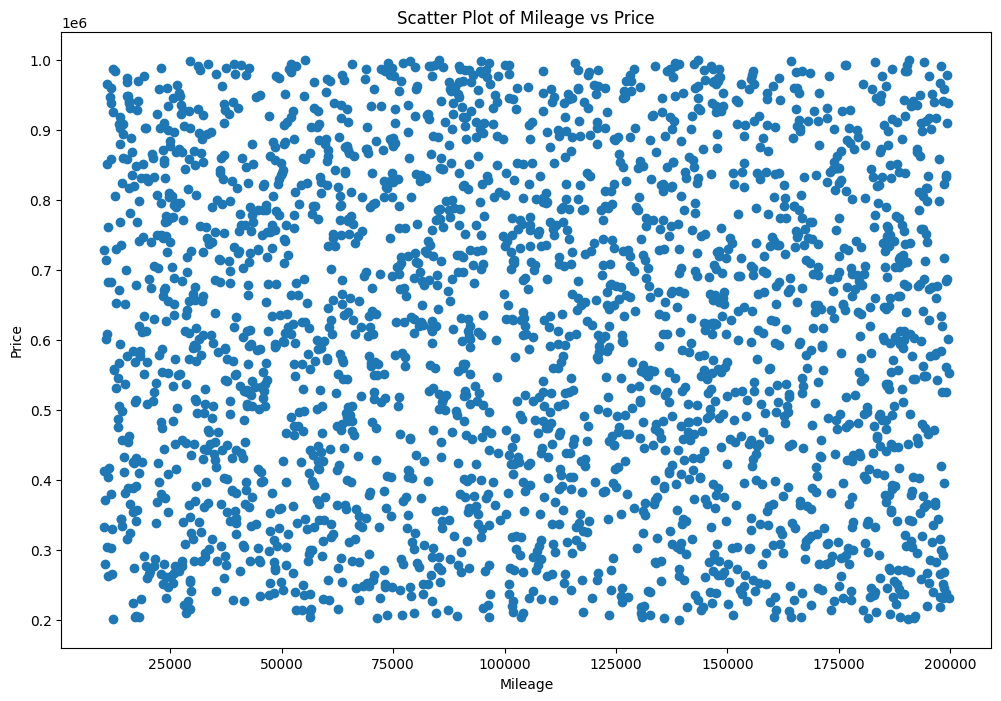

In [133]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Mileage'], df['Price'])
plt.title('Scatter Plot of Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

It looks like there is no outliers

### Outliers detection using Zscore
- Outlier detection using the Z-score method involves standardizing the dataset and then identifying data points that are a certain number of standard deviations away from the mean. The Z-score represents how many standard deviations a data point is from the mean of the data. Typically, a Z-score threshold of 3 or -3 is used to detect outliers, but this threshold can be adjusted based on the specific needs of the analysis.

In [134]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
df['Mileage_zscore'] = zscore(df['Mileage'])
df['Price_zscore'] = zscore(df['Price'])

# Identify outliers with z-score threshold of 3
mileage_outliers = df[(df['Mileage_zscore'].abs() > 3)]
price_outliers = df[(df['Price_zscore'].abs() > 3)]


print("Mileage Outliers:")
print(mileage_outliers)

print("Price Outliers:")
print(price_outliers)



Mileage Outliers:
Empty DataFrame
Columns: [Company Name, Car Name, Variant, Fuel Type, Tyre Condition, Make Year, Owner Type, Registration Number, Mileage, Price, Transmission Type, Body Color, Service Record, Insurance, Registration Certificate, Accessories, Mileage_zscore, Price_zscore]
Index: []
Price Outliers:
Empty DataFrame
Columns: [Company Name, Car Name, Variant, Fuel Type, Tyre Condition, Make Year, Owner Type, Registration Number, Mileage, Price, Transmission Type, Body Color, Service Record, Insurance, Registration Certificate, Accessories, Mileage_zscore, Price_zscore]
Index: []


Again, there is not outliers detected

### Detecing outliers using IQR method
- Detecting outliers using the Interquartile Range (IQR) method is a common and effective technique. The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. Outliers are typically defined as data points that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [135]:
# Calculate IQR for Mileage
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for Mileage
mileage_outliers_iqr = df[(df['Mileage'] < Q1 - 1.5 * IQR) | (df['Mileage'] > Q3 + 1.5 * IQR)]

# Calculate IQR for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for Price
price_outliers_iqr = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]

print("Mileage Outliers (IQR):")
print(mileage_outliers_iqr)

print("Price Outliers (IQR):")
print(price_outliers_iqr)


Mileage Outliers (IQR):
Empty DataFrame
Columns: [Company Name, Car Name, Variant, Fuel Type, Tyre Condition, Make Year, Owner Type, Registration Number, Mileage, Price, Transmission Type, Body Color, Service Record, Insurance, Registration Certificate, Accessories, Mileage_zscore, Price_zscore]
Index: []
Price Outliers (IQR):
Empty DataFrame
Columns: [Company Name, Car Name, Variant, Fuel Type, Tyre Condition, Make Year, Owner Type, Registration Number, Mileage, Price, Transmission Type, Body Color, Service Record, Insurance, Registration Certificate, Accessories, Mileage_zscore, Price_zscore]
Index: []


Again, no outliers detection


# Part 3: Exploratory Data Analysis Techniques

### Calculating basic statistics such as mean, median, mode, standard deviation, and range for numerical data.

In [136]:
df[['Price','Mileage']].describe()

,Price,Mileage
count,2500.000000,2500.000000
mean,608120.897600,104777.792000
std,231056.126713,55544.487467
min,200176.000000,10010.000000
25%,407791.000000,56313.000000
50%,612012.500000,104209.500000
75%,804567.000000,152149.250000
max,999826.000000,199755.000000


In [137]:
df.head(2)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Mileage_zscore,Price_zscore
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",-0.936010,0.653591
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,RXE,-1.105025,-0.446084


In [138]:
# let get categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color',
       'Service Record', 'Insurance', 'Registration Certificate',
       'Accessories'],
      dtype='object')

### Calculating Frequency and Percentage for categorical data and Visualizing them
- Box plot, histogram and scatter are hardly used for visualizing categorical data when it is not encoded
- We will try to use these plots after encoding
- For now, lets focus on barplots

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


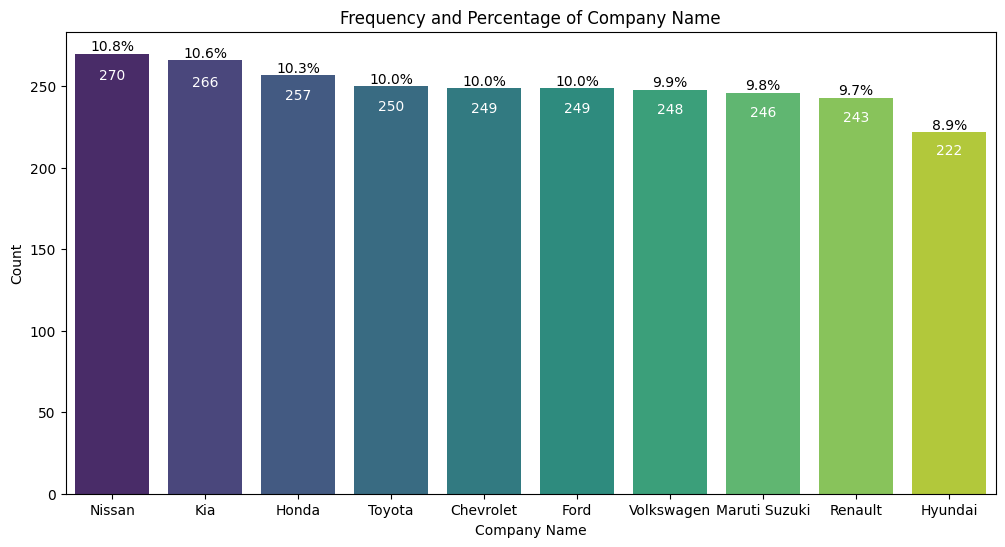

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


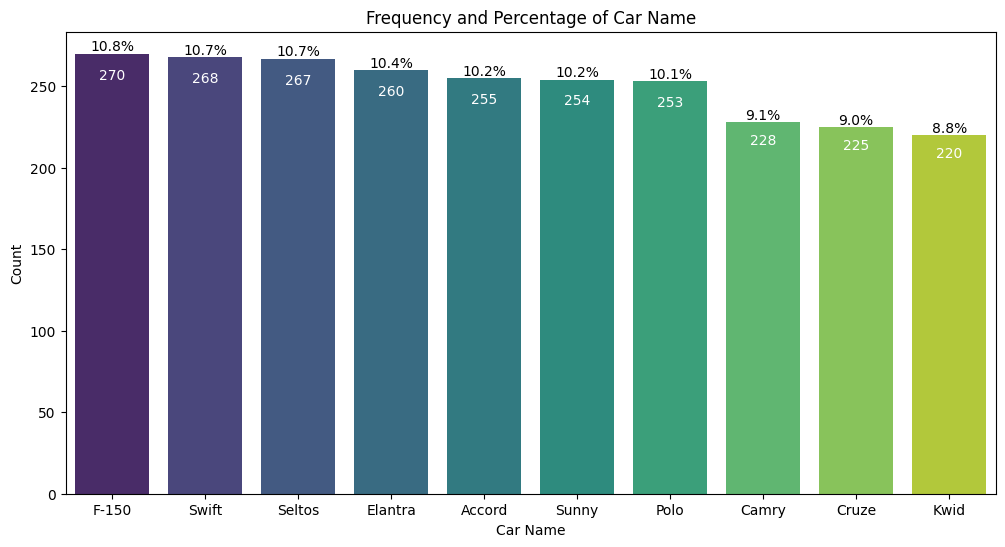

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


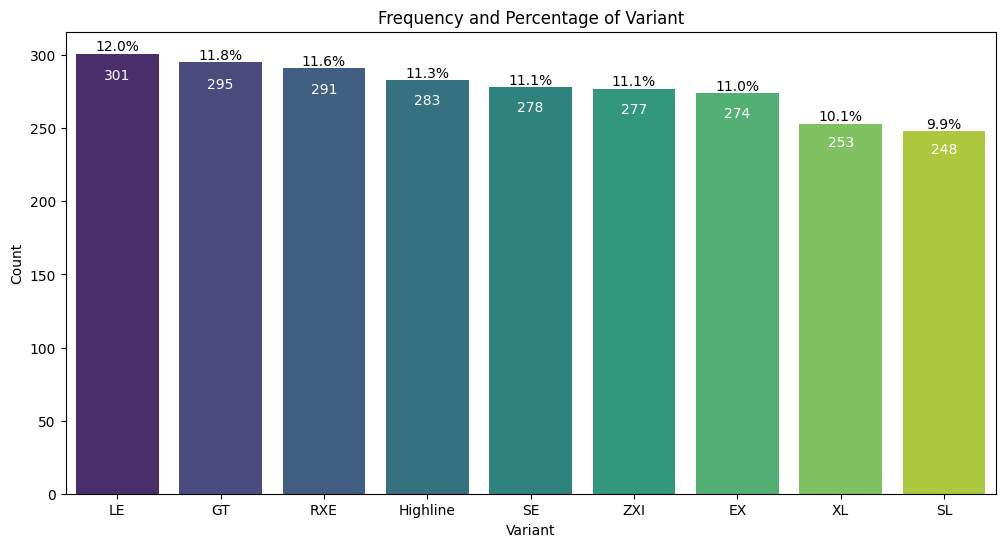

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


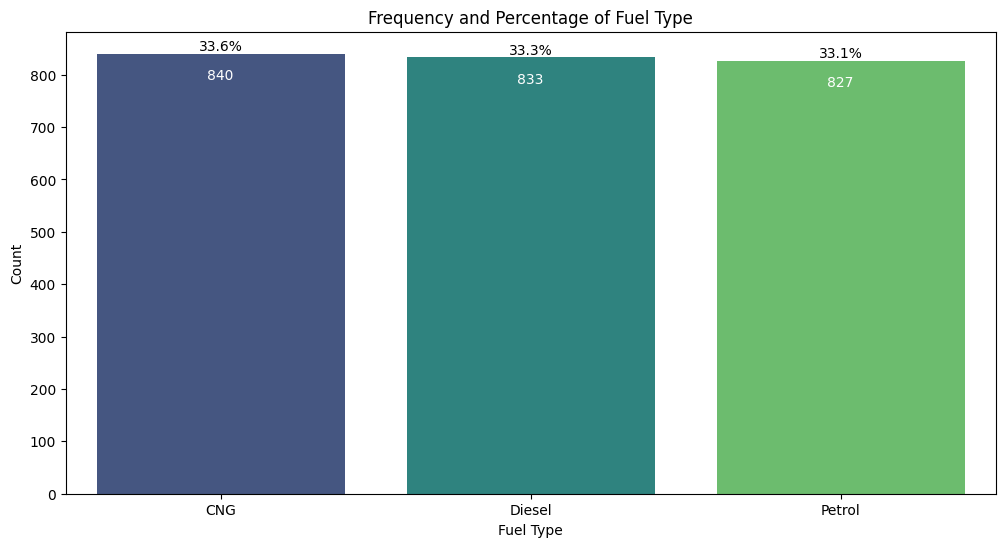

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


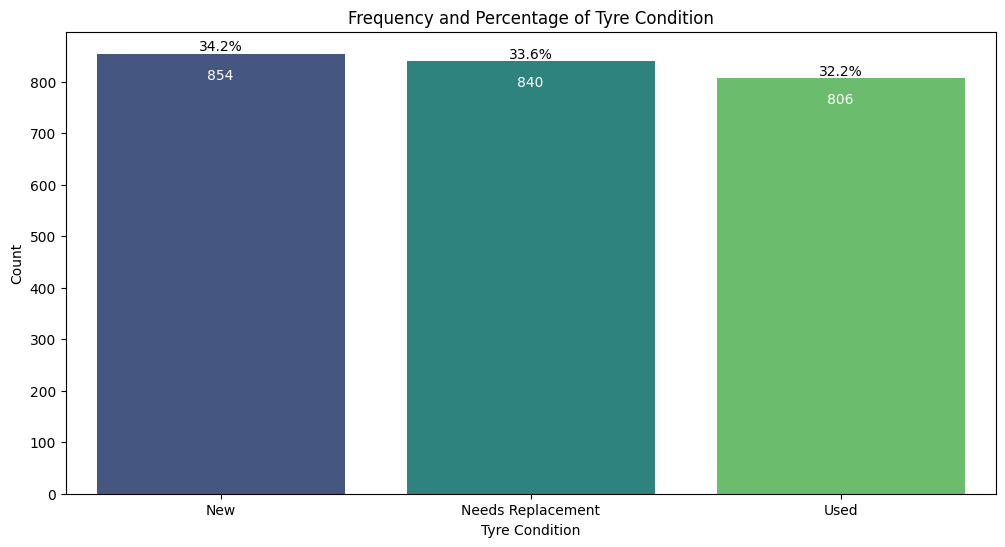

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


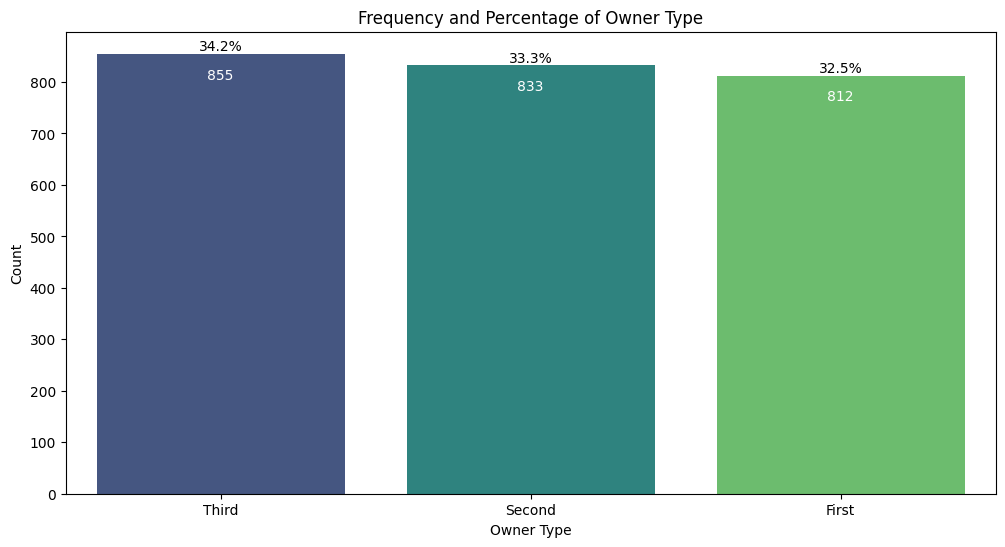

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


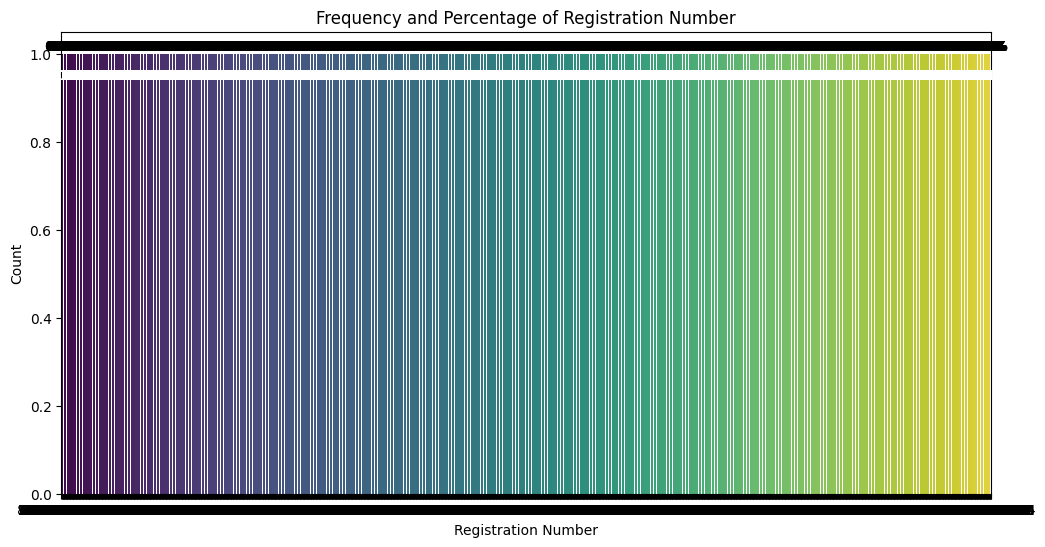

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


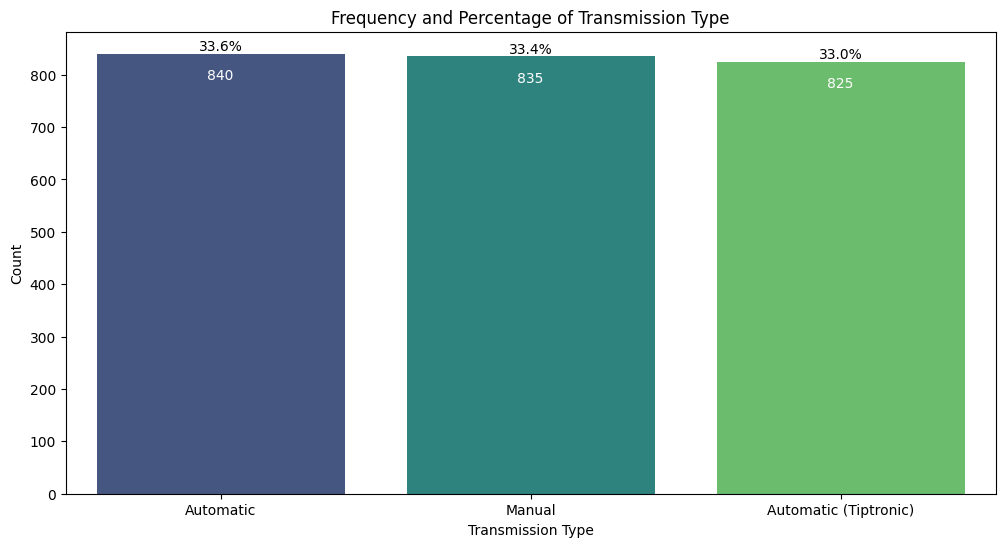

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


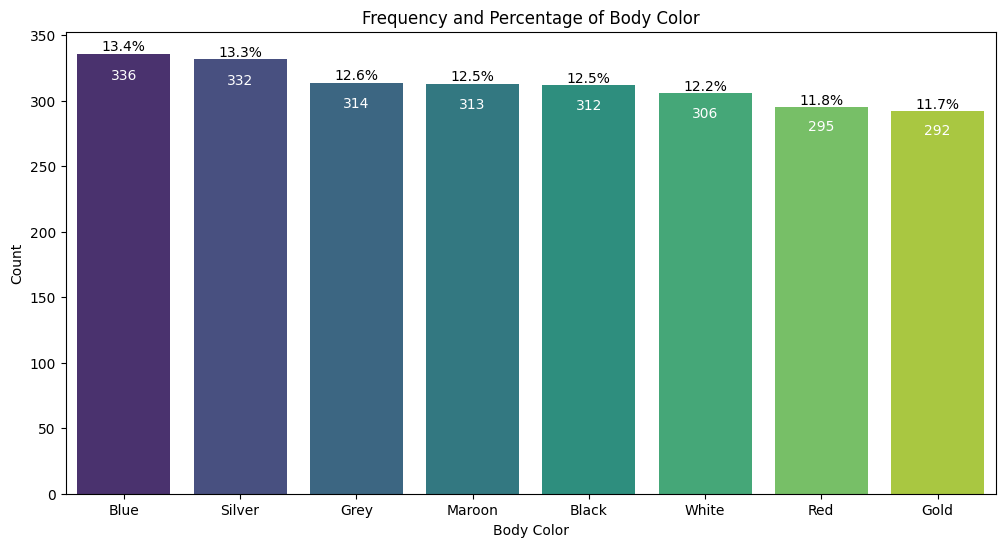

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


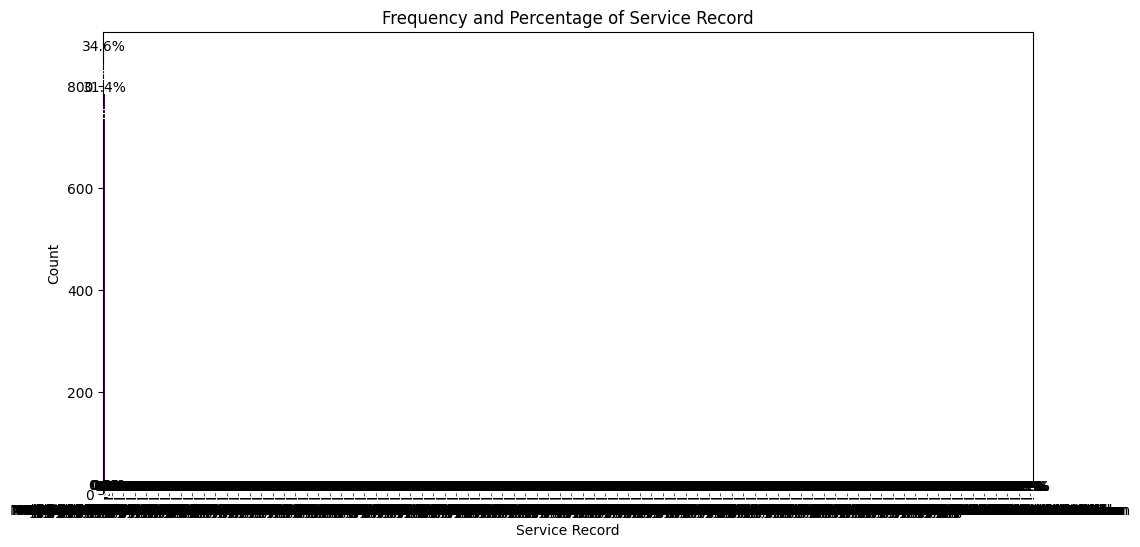

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


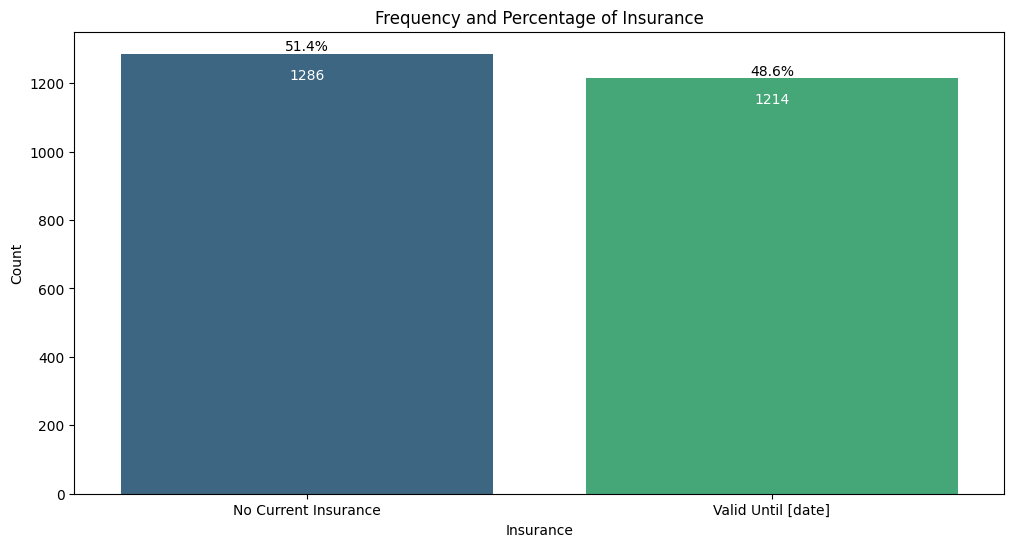

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


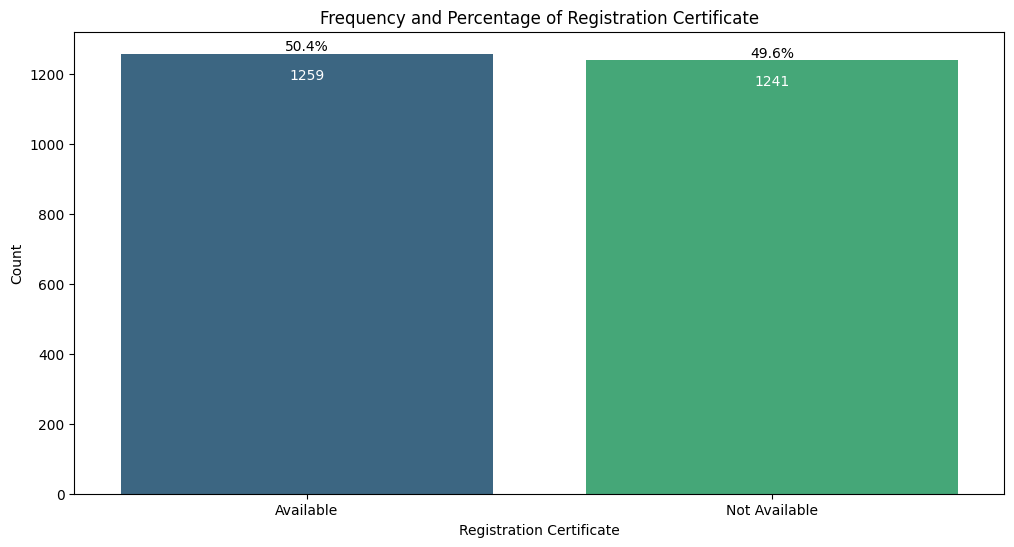

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13080\1627979444.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='Count', data=count_df, palette='viridis')


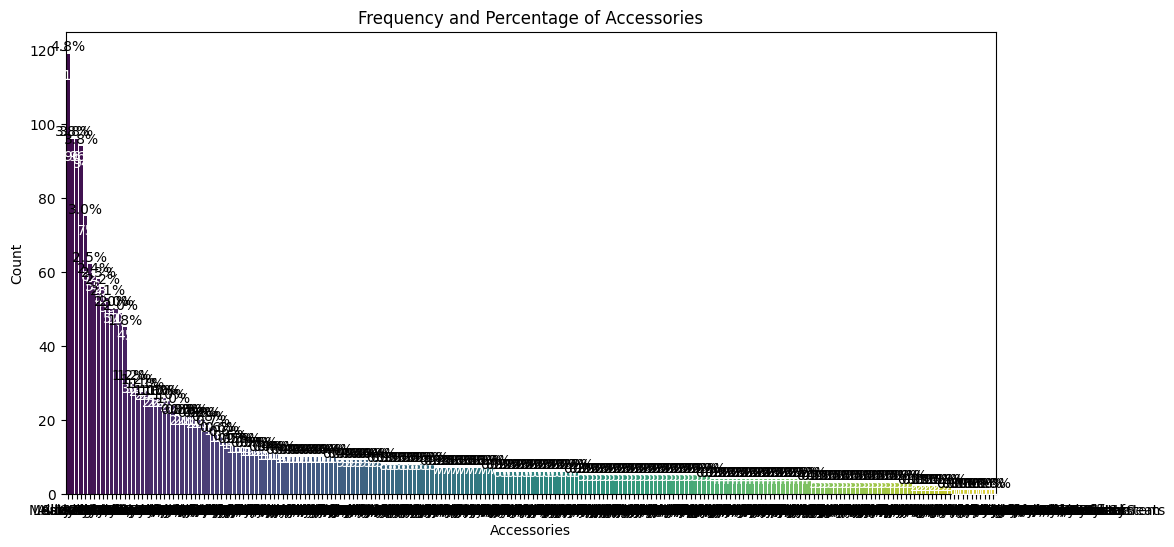

In [139]:
# Plot for each categorical column
for category in categorical_columns:
    # Calculate frequencies and percentages
    count = df[category].value_counts()
    percent = df[category].value_counts(normalize=True) * 100
    count_df = pd.DataFrame({
        category: count.index,
        'Count': count.values,
        'Percentage': percent.values
    })
    
    # Plotting the frequencies and percentages
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category, y='Count', data=count_df, palette='viridis')
    
    # Annotate each bar with the percentage
    for index, row in count_df.iterrows():
        plt.text(index, row.Count - (row.Count * 0.05), f'{int(row.Count)}', color='white', ha="center", va="center")
        plt.text(index, row.Count, f'{row.Percentage:.1f}%', color='black', ha="center", va="bottom")
    
    plt.title(f'Frequency and Percentage of {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    
    # Show plot
    plt.show()
   
   
   



While the visualization can give you detail on fequency and percentage of different value or categories across different categorical features, here is the list of some
- For Company Name, Nissan has the hihest number of frequency and percentage i.e. 10.8% and 270 counts. Whereas, Hyundai has lowest i.e. 8.9% and 222 counts.
- For Car Name, F-150 has the hihest number of frequency and percentage i.e. 10.8% and 270 counts. Whereas, Kwid has lowest i.e. 8.8% and 220 counts.
- For Variant, LE has the hihest number of frequency and percentage i.e. 12.1% and 302 counts. Whereas, SL has lowest i.e. 10.0% and 250 counts.
- For Fuel Types, CNG has the hihest number of frequency and percentage i.e. 33.6% and 840 counts. Whereas, Petrol has lowest i.e. 33.1% and 827 counts.
-For Tire Condition, New has the hihest number of frequency and percentage i.e. 34.2% and 854 counts. Whereas, Used has lowest i.e. 32.2% and 806 counts.
- For Owner Type, Third party has the hihest number of frequency and percentage i.e. 34.2% and 855 counts. Whereas, First has lowest i.e. 32.5% and 812 counts.
- For Transmission Type, Automatice has the hihest number of frequency and percentage i.e. 33.6% and 840 counts. Whereas, Automatic (Tiptronic) has lowest i.e. 33% and 825 counts.
- For Body Color, Blue has the hihest number of frequency and percentage i.e. 13.4% and 336 counts. Whereas, GOld has lowest i.e. 11.7% and 292 counts.
- For Insurance, No Current Insurance has the hihest number of frequency and percentage i.e. 51.4%% and 1286 counts. Whereas, Valid Until Date  has lowest i.e. 48.6% and 1214 counts.



# Part 4: Feature Engineering

## Extract new features from existing ones, such as extracting year from Make Year

In [140]:
df['Make Year'].dtype

dtype('int64')

In [141]:
#change date int64 to datetime
# Convert integer to string, then to datetime
df['Make Year'] = pd.to_datetime(df['Make Year'].astype(str), format='%Y')

In [142]:
# extracting year 
df['Year'] = df['Make Year'].dt.year

In [143]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Mileage_zscore,Price_zscore,Year
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018-01-01,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",-0.936010,0.653591,2018
1,Kia,Seltos,RXE,Petrol,New,2020-01-01,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,RXE,-1.105025,-0.446084,2020
2,Kia,Accord,RXE,Petrol,New,2022-01-01,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,EX,-0.172127,0.117749,2022
3,Nissan,Seltos,Highline,Diesel,Used,2024-01-01,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",-0.619588,-0.540968,2024
4,Chevrolet,Kwid,Highline,Petrol,Used,2018-01-01,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",-0.340800,0.453834,2018


In [144]:
df.columns 

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories', 'Mileage_zscore',
       'Price_zscore', 'Year'],
      dtype='object')

## Convert categorical variables into dummy variables.
-- Similar to one-hot encoding but with one category dropped to avoid multicollinearity (i.e., the dummy variable trap).


In [145]:
# selecting features for dummy variable
dummy_variable = ['Company Name', 'Car Name', 'Variant', 'Fuel Type']


In [146]:
df_dummies= pd.get_dummies(df[dummy_variable], drop_first=True,)  # drop_first=True avoids multicollinearity


In [147]:
df_dummies.columns

Index(['Company Name_Ford', 'Company Name_Honda', 'Company Name_Hyundai',
       'Company Name_Kia', 'Company Name_Maruti Suzuki', 'Company Name_Nissan',
       'Company Name_Renault', 'Company Name_Toyota',
       'Company Name_Volkswagen', 'Car Name_Camry', 'Car Name_Cruze',
       'Car Name_Elantra', 'Car Name_F-150', 'Car Name_Kwid', 'Car Name_Polo',
       'Car Name_Seltos', 'Car Name_Sunny', 'Car Name_Swift', 'Variant_GT',
       'Variant_Highline', 'Variant_LE', 'Variant_RXE', 'Variant_SE',
       'Variant_SL', 'Variant_XL', 'Variant_ZXI', 'Fuel Type_Diesel',
       'Fuel Type_Petrol'],
      dtype='object')

In [148]:
df_dummies = df_dummies.astype(int)

In [149]:
df_dummies

,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,Company Name_Toyota,Company Name_Volkswagen,Car Name_Camry,...,Variant_GT,Variant_Highline,Variant_LE,Variant_RXE,Variant_SE,Variant_SL,Variant_XL,Variant_ZXI,Fuel Type_Diesel,Fuel Type_Petrol
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2496,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2497,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2498,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [150]:
df = pd.concat([df, df_dummies], axis=1)

In [151]:
df.iloc[:,8:].head()

,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Mileage_zscore,Price_zscore,...,Variant_GT,Variant_Highline,Variant_LE,Variant_RXE,Variant_SE,Variant_SL,Variant_XL,Variant_ZXI,Fuel Type_Diesel,Fuel Type_Petrol
0,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",-0.936010,0.653591,...,0,0,0,0,0,0,0,0,0,0
1,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,RXE,-1.105025,-0.446084,...,0,0,0,1,0,0,0,0,0,1
2,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,EX,-0.172127,0.117749,...,0,0,0,1,0,0,0,0,0,1
3,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",-0.619588,-0.540968,...,0,1,0,0,0,0,0,0,1,0
4,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",-0.340800,0.453834,...,0,1,0,0,0,0,0,0,0,1


In [152]:
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories', 'Mileage_zscore',
       'Price_zscore', 'Year', 'Company Name_Ford', 'Company Name_Honda',
       'Company Name_Hyundai', 'Company Name_Kia',
       'Company Name_Maruti Suzuki', 'Company Name_Nissan',
       'Company Name_Renault', 'Company Name_Toyota',
       'Company Name_Volkswagen', 'Car Name_Camry', 'Car Name_Cruze',
       'Car Name_Elantra', 'Car Name_F-150', 'Car Name_Kwid', 'Car Name_Polo',
       'Car Name_Seltos', 'Car Name_Sunny', 'Car Name_Swift', 'Variant_GT',
       'Variant_Highline', 'Variant_LE', 'Variant_RXE', 'Variant_SE',
       'Variant_SL', 'Variant_XL', 'Variant_ZXI', 'Fuel Type_Diesel',
       'Fuel Type_Petrol'],
      dtype='object')

## using onehotencode to transform some columns that represents nominal data

In [153]:
from sklearn.preprocessing import OneHotEncoder
# Specify the features to be one-hot encoded
hot_encoder_features = ['Owner Type', 'Transmission Type', 'Registration Certificate', 'Insurance']
hot_df = df[hot_encoder_features]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to return a dense array

# Fit and transform the data for all specified features
onehot_encoded = encoder.fit_transform(hot_df)

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(hot_encoder_features))

# Display the resulting DataFrame
print(encoded_df)

      Owner Type_First  Owner Type_Second  Owner Type_Third  \
0                  0.0                1.0               0.0   
1                  0.0                0.0               1.0   
2                  0.0                1.0               0.0   
3                  0.0                0.0               1.0   
4                  0.0                1.0               0.0   
...                ...                ...               ...   
2495               1.0                0.0               0.0   
2496               0.0                1.0               0.0   
2497               0.0                0.0               1.0   
2498               0.0                1.0               0.0   
2499               0.0                1.0               0.0   

      Transmission Type_Automatic  Transmission Type_Automatic (Tiptronic)  \
0                             0.0                                      0.0   
1                             1.0                                      0.0   
2        

In [154]:
encoded_df.head()

,Owner Type_First,Owner Type_Second,Owner Type_Third,Transmission Type_Automatic,Transmission Type_Automatic (Tiptronic),Transmission Type_Manual,Registration Certificate_Available,Registration Certificate_Not Available,Insurance_No Current Insurance,Insurance_Valid Until [date]
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [155]:
df = pd.concat([df,encoded_df], axis=1)

In [156]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,...,Owner Type_First,Owner Type_Second,Owner Type_Third,Transmission Type_Automatic,Transmission Type_Automatic (Tiptronic),Transmission Type_Manual,Registration Certificate_Available,Registration Certificate_Not Available,Insurance_No Current Insurance,Insurance_Valid Until [date]
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018-01-01,Second,84-436-5584,52798,759107,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,Kia,Seltos,RXE,Petrol,New,2020-01-01,Third,79-114-3166,43412,505071,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Kia,Accord,RXE,Petrol,New,2022-01-01,Second,41-358-3344,95219,635322,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Nissan,Seltos,Highline,Diesel,Used,2024-01-01,Third,92-708-1763,70370,483152,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Chevrolet,Kwid,Highline,Petrol,Used,2018-01-01,Second,76-154-5485,85852,712961,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Using label encoder to tranform some columns, for column with huge value_count and data are ordinal type

In [157]:

from sklearn.preprocessing import LabelEncoder
labels = ['Tyre Condition','Owner Type','Body Color', 'Accessories']
# Initialize the LabelEncoder
label_encoders = {col: LabelEncoder() for col in labels}

# Apply LabelEncoder to each specified column
for col in labels:
    df[col] = label_encoders[col].fit_transform(df[col])

# Display the resulting DataFrame
print(df)

       Company Name Car Name   Variant Fuel Type  Tyre Condition  Make Year  \
0     Maruti Suzuki    Cruze        EX       CNG               0 2018-01-01   
1               Kia   Seltos       RXE    Petrol               1 2020-01-01   
2               Kia   Accord       RXE    Petrol               1 2022-01-01   
3            Nissan   Seltos  Highline    Diesel               2 2024-01-01   
4         Chevrolet     Kwid  Highline    Petrol               2 2018-01-01   
...             ...      ...       ...       ...             ...        ...   
2495         Toyota  Elantra       RXE    Petrol               1 2015-01-01   
2496            Kia    Sunny        LE       CNG               0 2024-01-01   
2497         Nissan    Sunny       RXE    Diesel               2 2022-01-01   
2498          Honda    Swift        XL       CNG               0 2019-01-01   
2499        Renault     Kwid        GT    Diesel               0 2024-01-01   

      Owner Type Registration Number  Mileage   Pri

In [158]:
df[['Tyre Condition','Owner Type','Body Color', 'Accessories']].head()

,Tyre Condition,Owner Type,Body Color,Accessories
0,0,1,3,159
1,1,2,4,168
2,1,1,0,41
3,2,2,4,128
4,2,1,6,63


## Normalize or standardize numerical features.
-- let Normalize Mileage and price


In [159]:
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories', 'Mileage_zscore',
       'Price_zscore', 'Year', 'Company Name_Ford', 'Company Name_Honda',
       'Company Name_Hyundai', 'Company Name_Kia',
       'Company Name_Maruti Suzuki', 'Company Name_Nissan',
       'Company Name_Renault', 'Company Name_Toyota',
       'Company Name_Volkswagen', 'Car Name_Camry', 'Car Name_Cruze',
       'Car Name_Elantra', 'Car Name_F-150', 'Car Name_Kwid', 'Car Name_Polo',
       'Car Name_Seltos', 'Car Name_Sunny', 'Car Name_Swift', 'Variant_GT',
       'Variant_Highline', 'Variant_LE', 'Variant_RXE', 'Variant_SE',
       'Variant_SL', 'Variant_XL', 'Variant_ZXI', 'Fuel Type_Diesel',
       'Fuel Type_Petrol', 'Owner Type_First', 'Owner Type_Second',
       'Owner Type_Third', 'Trans

In [160]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Mileage','Price']])
normalized_df = pd.DataFrame(normalized_data, columns=['Mileage_normalized','Price_normalized'])
normalized_df.head()

,Mileage_normalized,Price_normalized
0,0.225503,0.698970
1,0.176036,0.381286
2,0.449071,0.544171
3,0.318111,0.353875
4,0.399705,0.641262


In [161]:
df = pd.concat([df,normalized_df],axis=1)

In [162]:
## use Corr() to find correlation for numerical data


In [163]:
corr_matrix = df[['Mileage','Price']].corr()
corr_matrix


,Mileage,Price
Mileage,1.000000,-0.027504
Price,-0.027504,1.000000


### finding Correlation matrix

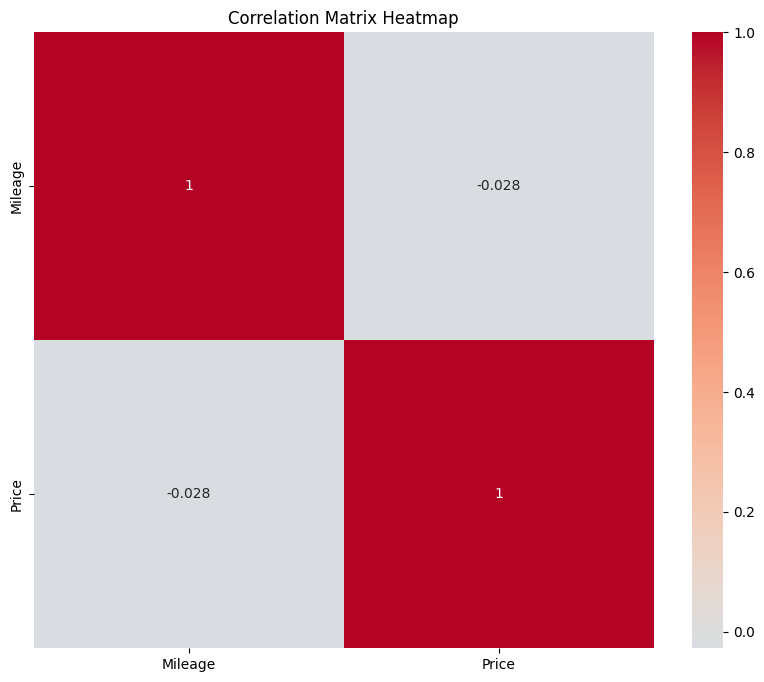

In [164]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

### lets remove some similar columns

In [165]:
df.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Registration Number', 'Mileage', 'Price',
       'Transmission Type', 'Body Color', 'Service Record', 'Insurance',
       'Registration Certificate', 'Accessories', 'Mileage_zscore',
       'Price_zscore', 'Year', 'Company Name_Ford', 'Company Name_Honda',
       'Company Name_Hyundai', 'Company Name_Kia',
       'Company Name_Maruti Suzuki', 'Company Name_Nissan',
       'Company Name_Renault', 'Company Name_Toyota',
       'Company Name_Volkswagen', 'Car Name_Camry', 'Car Name_Cruze',
       'Car Name_Elantra', 'Car Name_F-150', 'Car Name_Kwid', 'Car Name_Polo',
       'Car Name_Seltos', 'Car Name_Sunny', 'Car Name_Swift', 'Variant_GT',
       'Variant_Highline', 'Variant_LE', 'Variant_RXE', 'Variant_SE',
       'Variant_SL', 'Variant_XL', 'Variant_ZXI', 'Fuel Type_Diesel',
       'Fuel Type_Petrol', 'Owner Type_First', 'Owner Type_Second',
       'Owner Type_Third', 'Trans

In [166]:
remove_columns = ['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Owner Type', 'Transmission Type', 'Registration Certificate', 'Insurance','Mileage_zscore',
       'Price_zscore','Mileage', 'Price']

df.drop(remove_columns, axis =1, inplace=True)

In [167]:
df.head()

,Tyre Condition,Make Year,Registration Number,Body Color,Service Record,Accessories,Year,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,...,Owner Type_Third,Transmission Type_Automatic,Transmission Type_Automatic (Tiptronic),Transmission Type_Manual,Registration Certificate_Available,Registration Certificate_Not Available,Insurance_No Current Insurance,Insurance_Valid Until [date],Mileage_normalized,Price_normalized
0,0,2018-01-01,84-436-5584,3,Major Service at 50418 km,159,2018,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.225503,0.698970
1,1,2020-01-01,79-114-3166,4,Major Service at 131313 km,168,2020,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.176036,0.381286
2,1,2022-01-01,41-358-3344,0,No Service Record,41,2022,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.449071,0.544171
3,2,2024-01-01,92-708-1763,4,Major Service at 98115 km,128,2024,0,0,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.318111,0.353875
4,2,2018-01-01,76-154-5485,6,Major Service at 135665 km,63,2018,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.399705,0.641262


In [168]:
df.columns

Index(['Tyre Condition', 'Make Year', 'Registration Number', 'Body Color',
       'Service Record', 'Accessories', 'Year', 'Company Name_Ford',
       'Company Name_Honda', 'Company Name_Hyundai', 'Company Name_Kia',
       'Company Name_Maruti Suzuki', 'Company Name_Nissan',
       'Company Name_Renault', 'Company Name_Toyota',
       'Company Name_Volkswagen', 'Car Name_Camry', 'Car Name_Cruze',
       'Car Name_Elantra', 'Car Name_F-150', 'Car Name_Kwid', 'Car Name_Polo',
       'Car Name_Seltos', 'Car Name_Sunny', 'Car Name_Swift', 'Variant_GT',
       'Variant_Highline', 'Variant_LE', 'Variant_RXE', 'Variant_SE',
       'Variant_SL', 'Variant_XL', 'Variant_ZXI', 'Fuel Type_Diesel',
       'Fuel Type_Petrol', 'Owner Type_First', 'Owner Type_Second',
       'Owner Type_Third', 'Transmission Type_Automatic',
       'Transmission Type_Automatic (Tiptronic)', 'Transmission Type_Manual',
       'Registration Certificate_Available',
       'Registration Certificate_Not Available',
      